
Korelasyon Katsayısı:
                 vucut_agırlıgı  bench_pr
vucut_agırlıgı        1.000000  0.991574
bench_pr              0.991574  1.000000


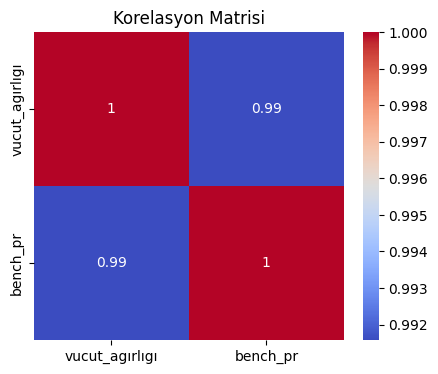

                            OLS Regression Results                            
Dep. Variable:               bench_pr   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     468.7
Date:                Mon, 19 Jan 2026   Prob (F-statistic):           2.18e-08
Time:                        04:11:36   Log-Likelihood:                -26.452
No. Observations:                  10   AIC:                             56.90
Df Residuals:                       8   BIC:                             57.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -76.0593      7.742     -9.

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


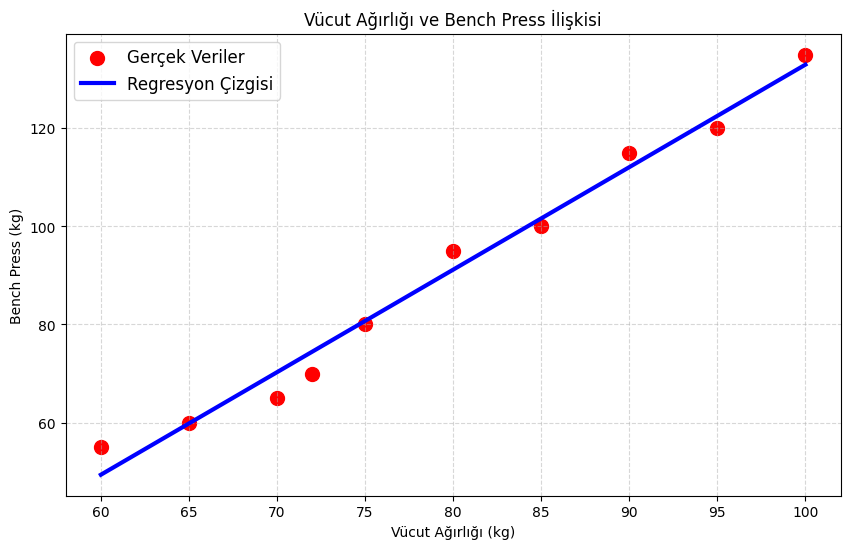

In [20]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Verileri girdim.(Gemini'dan rastgele ürettirdim.)
data = {
    'body_weight': [60, 65, 70, 72, 75, 80, 85, 90, 95, 100],
    'bench_max':   [55, 60, 65, 70, 80, 95, 100, 115, 120, 135]
}

df = pd.DataFrame(data)

# Sütun isimlerini türkçe haliyle yazdım.
df = df.rename(columns={"body_weight": "vucut_agırlıgı", "bench_max": "bench_pr"})
# Değişkenlerin arasındaki korelasyona bakıyoruz.
Correlation = df.corr()
print("\nKorelasyon Katsayısı:\n" , Correlation)
# Isı haritasıyla görselleştiriyoruz.
plt.figure(figsize=(5,4))
sns.heatmap(Correlation , annot=True , cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

# Bağımlı değişkenimiz(y),bağımsız değişkenimiz(X) vücut ağırlığı olur.Çünkü X'in değişimi y'yi etkiler. (y=aX+b)
y = df['bench_pr']
X = df[['vucut_agırlıgı']]

# OLS'nin çalışması için sabit sayı (intercept) eklemek şart.Bilgisayarın yaptığı matris çarpımı gereği bir değer gerekiyor.Sonuç etkilenmesiz diye 1 ekliyoruz.Bu kod ilk satıra tamamen 1 yazar.
X = sm.add_constant(X)

# Modeli kurup çalıştır
model = sm.OLS(y, X).fit()

# Sonuç tablosu
print(model.summary())

# Deneme tahmini: 110 kg biri kaç basar?
# Köşeli parantez içine [1, Kilo] yazıyoruz. 1 sabit sayı için.
tahmin = model.predict([1, 110])
print("\n110 kg için tahmin:",tahmin[0].round(2))

# Görselleştirme (Seaborn ile)
# Görselleştirme (Renkler Güncellendi: Çizgi Mavi, Noktalar Kırmızı)
plt.figure(figsize=(10, 6))

# 1. Noktaları Kırmızı (red) yapıyoruz
plt.scatter(df['vucut_agırlıgı'], df['bench_pr'], color='red', s=100, label='Gerçek Veriler')

# 2. Regresyon çizgisini Mavi (blue) yapıyoruz
sns.regplot(x="vucut_agırlıgı", y="bench_pr", data=df, ci=None, 
            scatter=False, 
            line_kws={'color': 'blue', 'linewidth': 3}, 
            label='Regresyon Çizgisi')

# 3. Legend'ı ekliyoruz
plt.legend(loc='upper left', fontsize=12) 

plt.title('Vücut Ağırlığı ve Bench Press İlişkisi')
plt.xlabel('Vücut Ağırlığı (kg)')
plt.ylabel('Bench Press (kg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()